In [1]:
# Import MNIST data and python basics
import os, sys
import platform
import pickle
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit, mnist_model_examination
from cnn_from_scratch.trainer import CNN_trainer
from cnn_from_scratch.activation_function import *

do_quick_training = True

if platform.system() == 'Windows':
    work_dir = 'C:/Users/jiang/workspace/cnn_from_scratch/'
elif platform.system() == 'macOS':
    work_dir = '/Users/idchiang/working/cnn_from_scratch/'
filename_mymodel = work_dir + '/model/MyTrainer_quick_0916.pkl'
filename_mlp = work_dir + '/model/MLPTrainer_0916.pkl'

x_train, y_train, x_test, y_test = load_mnist()

if do_quick_training:
    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_test = x_test[:5000]
    y_test = y_test[:5000]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10000, 784) (10000, 10) (5000, 784) (5000, 10)


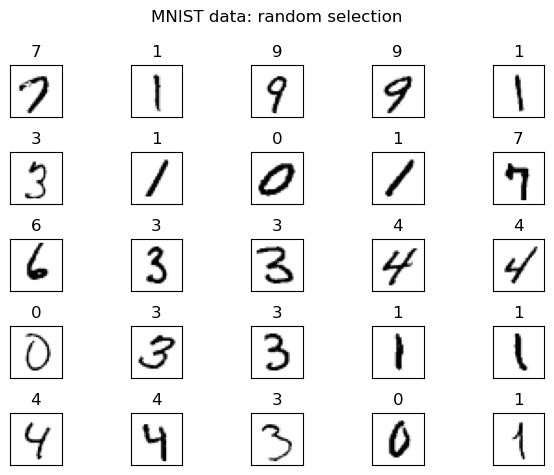

In [2]:
# Random MNIST visualization
plt.close('all')
plt.ion()
fig, axs = plt.subplots(5, 5)
idxs = np.random.randint(len(x_train), size=25)
for q in range(25):
    i, j = q // 5, q % 5
    show_mnist_digit(x_train[idxs[q]], y_train[idxs[q]], axs[i, j])
fig.suptitle('MNIST data: random selection')
fig.tight_layout()

In [3]:
# Some shared parameters
model_input_dim = x_train.shape[1]
model_output_dim = y_train.shape[1]

hidden_layer_sizes = [270, 90, 30]
# hidden_layer_sizes = [256, 64]
activation = 'relu'

max_iter = 20
learning_rate_init = 1e-2
batch_size = 1  # Sorry, something is wrong now

# CNN_trainer MyTrainer_0916, Epoch: 1/20 - 19:25:42          - Train loss = 0.097; Test loss = 0.115
          - Train acc = 85.8%; Test acc = 82.2%
# CNN_trainer MyTrainer_0916, Epoch: 2/20 - 19:26:59          - Train loss = 0.059; Test loss = 0.080
          - Train acc = 91.9%; Test acc = 87.7%
# CNN_trainer MyTrainer_0916, Epoch: 3/20 - 19:28:13          - Train loss = 0.046; Test loss = 0.068
          - Train acc = 93.4%; Test acc = 89.1%
# CNN_trainer MyTrainer_0916, Epoch: 4/20 - 19:29:28          - Train loss = 0.036; Test loss = 0.058
          - Train acc = 94.9%; Test acc = 90.8%
# CNN_trainer MyTrainer_0916, Epoch: 5/20 - 19:30:41          - Train loss = 0.030; Test loss = 0.053
          - Train acc = 95.8%; Test acc = 91.6%
# CNN_trainer MyTrainer_0916, Epoch: 6/20 - 19:31:53          - Train loss = 0.026; Test loss = 0.048
          - Train acc = 96.6%; Test acc = 92.6%
# CNN_trainer MyTrainer_0916, Epoch: 7/20 - 19:33:05          - Train loss = 0.021; Test loss = 0.04

c:\Users\jiang\workspace\cnn_from_scratch\cnn_from_scratch\trainer.py:238: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.set_xlabel('N')


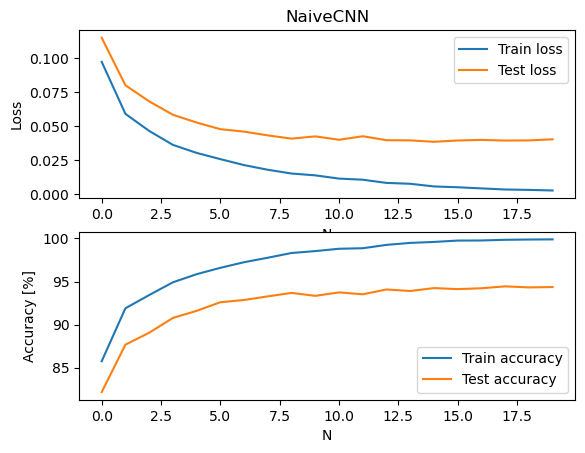

In [23]:
# Train our own model
my_trainer = CNN_trainer(name='MyTrainer_0916')
my_trainer.set_data(x_train, y_train, x_test, y_test)
my_trainer.naive_model(model_input_dim=model_input_dim,
                       model_output_dim=model_output_dim,
                       hidden_dims=hidden_layer_sizes,
                       hidden_act_func=ReLUActFunc(),
                       output_act_func=SigmoidActFunc())
my_trainer.train_model(n_epoch=max_iter,
                       batch_size=batch_size,
                       learning_rate=learning_rate_init,
                       do_acc=True)
my_trainer.savefile(filename_mymodel)

In [4]:
# Benchmark performance with sklearn

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=0.,
                    solver='sgd', verbose=True, batch_size=batch_size,
                    activation=activation, learning_rate_init=learning_rate_init)

mlp_train_acc_arr = []
mlp_test_acc_arr = []
classes = [num for num in range(10)]
for i in range(max_iter):
    mlp.partial_fit(x_train, y_train.argmax(axis=1), classes=classes)
    mlp_train_acc_arr.append(mlp.score(x_train, y_train.argmax(axis=1)))
    mlp_test_acc_arr.append(mlp.score(x_test, y_test.argmax(axis=1)))

# Predict and evaluate
mlp_final_loss = mlp.loss_
print(f"MLPClassifier Final train accuracy: {mlp_train_acc_arr[-1] * 100:.2f}%")
print(f"MLPClassifier Final train loss: {mlp_final_loss:.3f}")

mlp_train_loss = mlp.loss_curve_
plt.close('all')
plt.figure()
plt.plot(np.arange(len(mlp_train_loss)) + 1, mlp_train_loss, label='MLP Train Loss')
plt.xlabel('N Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Loss Curve')

plt.figure()
plt.plot(np.arange(len(mlp_train_loss)) + 1, np.array(mlp_train_acc_arr) * 100, label='MLP Train Acc')
plt.plot(np.arange(len(mlp_train_loss)) + 1, np.array(mlp_test_acc_arr) * 100, label='MLP Test Acc')
plt.xlabel('N Iteration')
plt.ylabel('Accuracy [%]')
plt.legend()
plt.title('MLP Accuracy Curve')

# save
with open(filename_mlp,'wb') as f:
    pickle.dump(mlp, f)


Iteration 1, loss = 2.23426614
Iteration 1, loss = 2.32344456
Iteration 1, loss = 2.32318680
Iteration 1, loss = 2.32152312
Iteration 1, loss = 2.32515807
Iteration 1, loss = 2.32260366
Iteration 1, loss = 2.32277687
Iteration 1, loss = 2.32356270
Iteration 1, loss = 2.32217566
Iteration 1, loss = 2.32344222
Iteration 1, loss = 2.32495237
Iteration 1, loss = 2.32343833
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32115787
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32207716
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32345223
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32209507
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32558191
Training loss did not i

c:\Users\jiang\miniconda3\envs\py311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


C:\Users\jiang\AppData\Local\Temp\ipykernel_18152\4037362823.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\jiang\AppData\Local\Temp\ipykernel_18152\4037362823.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


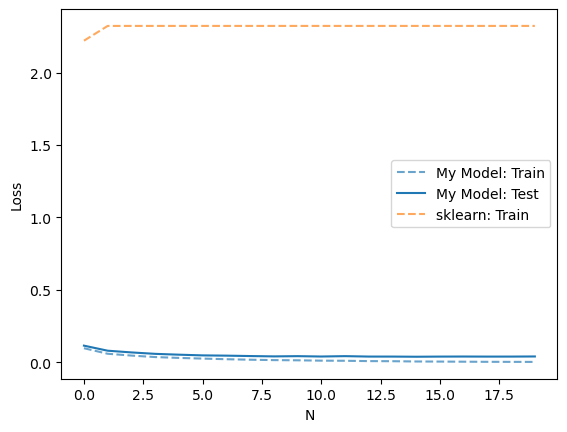

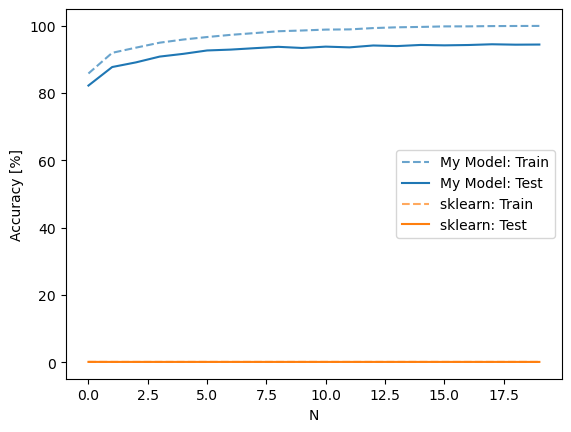

In [25]:
# Plot: my model & sklearn

# Loss history
fig, ax = plt.subplots()
ax.plot(np.arange(len(my_trainer.history_train_loss)), my_trainer.history_train_loss,
        color='tab:blue', label='My Model: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(my_trainer.history_train_loss)), my_trainer.history_test_loss,
        color='tab:blue', label='My Model: Test')
ax.plot(np.arange(len(mlp_train_loss)), mlp_train_loss,
        color='tab:orange', label='sklearn: Train', linestyle='dashed', alpha=2/3)
ax.set_ylabel('Loss')
ax.set_xlabel('N')
ax.legend()

fig.show()

# Accuracy history
fig, ax = plt.subplots()
ax.plot(np.arange(len(my_trainer.history_train_loss)), np.array(my_trainer.history_train_acc),
        color='tab:blue', label='My Model: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(my_trainer.history_train_loss)), np.array(my_trainer.history_test_acc),
        color='tab:blue', label='My Model: Test')
ax.plot(np.arange(len(mlp_train_acc_arr)), np.array(mlp_train_acc_arr),
        color='tab:orange', label='sklearn: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(mlp_test_acc_arr)), np.array(mlp_test_acc_arr),
        color='tab:orange', label='sklearn: Test')
ax.set_ylabel('Accuracy [%]')
ax.set_xlabel('N')
ax.legend()

fig.show()

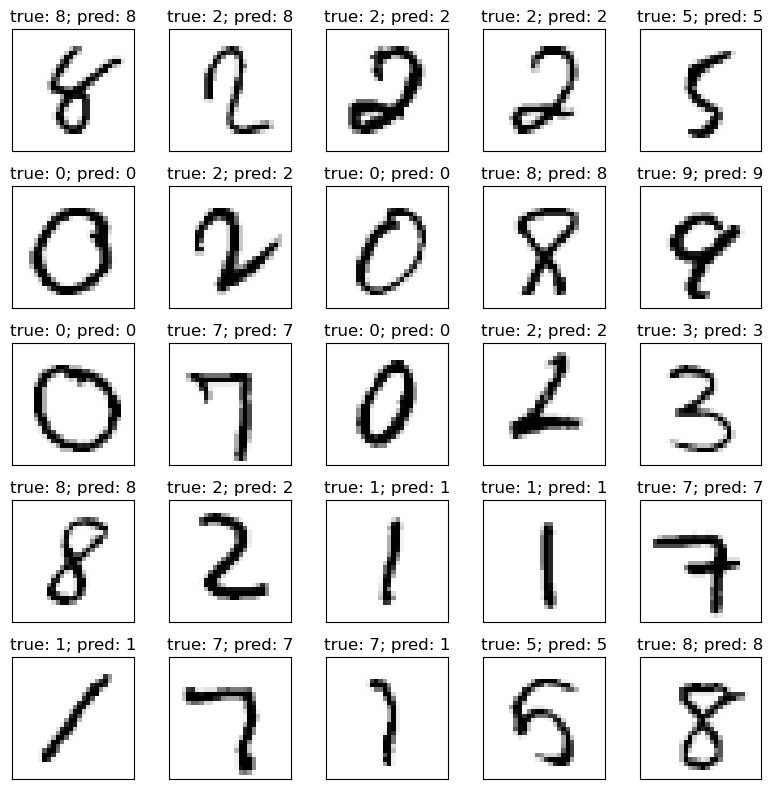

In [4]:
# load: both my & sklearn model for demonstration
my_trainer2 = CNN_trainer.loadfile(filename_mymodel)

with open(filename_mlp, 'rb') as f:
    mlp2 = pickle.load(f)

mnist_model_examination(my_trainer2, x_test, y_test)

In [31]:
# Heatmap
import pandas as pd
import seaborn as sns

# My model
y_true = np.argmax(y_test, axis=1)
y_pred_my = []
for x_in in x_test:
    a_pred = my_trainer2.predict(x_in)
    y_pred_my.append(np.argmax(a_pred))
df_my = pd.DataFrame(
    data = {'True': y_true,
            'Predicted': y_pred_my}
)

pivot_table_my = df_my.pivot_table(index='True', columns='Predicted', aggfunc='size', fill_value=0)
plt.figure()
sns.heatmap(pivot_table_my, annot=True, square=True)
plt.title('My Model')

# 
a_pred_mlp = mlp2.predict(x_test)
# y_pred_mlp = np.argmax(a_pred_mlp, axis=1)
df_mlp = pd.DataFrame(
    data = {'True': y_true,
            'Predicted': a_pred_mlp}
)
pivot_table_mlp = df_mlp.pivot_table(index='True', columns='Predicted', aggfunc='size', fill_value=0)
plt.figure()
sns.heatmap(pivot_table_mlp, annot=True, square=True)
plt.title('MLP')
